In [1]:
# importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


In [2]:
#import csv file
asteroid_data=pd.read_csv('/content/Asteroid_Updated.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#getting insight about the columns
column_headers =asteroid_data.keys().values.tolist()
print("The Column Header :", column_headers)

The Column Header : ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


In [4]:
#getting descriptionof columns
asteroid_data.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,732347.000000,732347.000000,732347.000000,732347.000000,732346.000000,732346.000000,732346.000000,732346.000000,722039.000000,732346.000000,...,18580.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,7.219640e+05,732346.000000,7.323460e+05,732340.000000
mean,2.865394,0.151876,8.688928,168.434154,180.935296,2.402047,3.328741,6.229108,6187.341993,290.611562,...,21.282642,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.417907e+00,0.234828,2.275182e+03,179.380820
std,5.038625,0.087030,6.427031,103.248892,104.029381,2.086104,9.049105,135.118431,4173.780241,388.014629,...,73.528476,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.096917e+00,0.070466,4.935201e+04,106.352074
min,0.600855,0.000000,0.007546,0.000388,0.001666,0.070511,0.803780,0.465760,0.000000,2.000000,...,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,0.000015,1.701189e+02,-67.136826
25%,2.387024,0.090982,3.950364,79.388664,90.932135,1.980084,2.774654,3.688021,4369.000000,66.000000,...,4.250000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.867050e-01,0.190432,1.347050e+03,85.756726
50%,2.643265,0.142351,7.009930,160.986825,181.279014,2.228310,3.029094,4.297533,6170.000000,144.000000,...,6.676450,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.240420e+00,0.229347,1.569674e+03,179.023935
75%,2.992101,0.196688,11.933697,251.715947,271.440446,2.580368,3.348536,5.175743,7571.000000,344.000000,...,12.630250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.592070e+00,0.267251,1.890440e+03,272.796388
max,1603.442512,0.995512,175.188725,359.999787,359.999833,80.424175,3192.315411,64207.874441,72684.000000,9325.000000,...,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.116167,2.345193e+07,491.618014


In [5]:
# viewing first 5 rows of dataset
asteroid_data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [6]:
# info about dataset
asteroid_data.info

<bound method DataFrame.info of            name         a         e          i          om           w  \
0         Ceres  2.769165  0.076009  10.594067   80.305532   73.597694   
1        Pallas  2.772466  0.230337  34.836234  173.080063  310.048857   
2          Juno  2.669150  0.256942  12.988919  169.852760  248.138626   
3         Vesta  2.361418  0.088721   7.141771  103.810804  150.728541   
4       Astraea  2.574249  0.191095   5.366988  141.576605  358.687607   
...         ...       ...       ...        ...         ...         ...   
732342      NaN  3.232905  0.141784   4.863835   19.195864   56.271572   
732343      NaN  2.619517  0.076952   2.338647  273.505442   83.381747   
732344      NaN  2.359209  0.067121   3.540011  279.387465  145.999698   
732345      NaN  1.942533  0.080124  21.628695  240.875167   98.608495   
732346      NaN  2.777075  0.199917   3.037571  287.504625         NaN   

               q        ad     per_y  data_arc  ...     UB  IR  spec_B spec_T  

In [7]:
# getting number of missing value for each feature
asteroid_data.isnull().sum()

name              710381
a                      0
e                      0
i                      0
om                     0
w                      1
q                      1
ad                     1
per_y                  1
data_arc           10308
condition_code       284
n_obs_used             1
H                   2684
neo                    1
pha                10383
diameter          595469
extent            732329
albedo            596638
rot_per           713767
GM                732333
BV                731326
UB                731368
IR                732346
spec_B            730681
spec_T            731367
G                 732228
moid               10383
class                  1
n                      1
per                    1
ma                     7
dtype: int64

In [8]:
# filling ' ' in csv with nan
import numpy as np

asteroid_data['name'] = asteroid_data['name'].replace(' ', np.nan)
#df = df.dropna(axis=0, subset=['Charge_Per_Line'])

In [9]:
asteroid_data['condition_code'] = asteroid_data['condition_code'].replace(' ', np.nan)
asteroid_data['diameter'] = asteroid_data['diameter'].replace(' ', np.nan)
asteroid_data['extent'] = asteroid_data['extent'].replace(' ', np.nan)
asteroid_data['albedo'] = asteroid_data['albedo'].replace(' ', np.nan)
asteroid_data['rot_per'] = asteroid_data['rot_per'].replace(' ', np.nan)
asteroid_data['GM'] = asteroid_data['GM'].replace(' ', np.nan)
asteroid_data['BV'] = asteroid_data['BV'].replace(' ', np.nan)
asteroid_data['UB'] = asteroid_data['UB'].replace(' ', np.nan)
asteroid_data['IR'] = asteroid_data['IR'].replace(' ', np.nan)
asteroid_data['spec_B'] = asteroid_data['spec_B'].replace(' ', np.nan)
asteroid_data['spec_T'] = asteroid_data['spec_T'].replace(' ', np.nan)
asteroid_data['G'] = asteroid_data['G'].replace(' ', np.nan)
asteroid_data['ma'] = asteroid_data['ma'].replace(' ', np.nan)

In [10]:
asteroid_data.isnull().sum()

name              710381
a                      0
e                      0
i                      0
om                     0
w                      1
q                      1
ad                     1
per_y                  1
data_arc           10308
condition_code       284
n_obs_used             1
H                   2684
neo                    1
pha                10383
diameter          595469
extent            732329
albedo            596638
rot_per           713767
GM                732333
BV                731326
UB                731368
IR                732346
spec_B            730681
spec_T            731367
G                 732228
moid               10383
class                  1
n                      1
per                    1
ma                     7
dtype: int64

In [11]:
# droping those columns having around or more than 80% missing data
asteroid_data.drop(asteroid_data[['name', 'extent','rot_per','GM','BV','UB','IR','spec_B','spec_T','G']], axis=1,inplace=True)

In [12]:
# rechecking number of null values
asteroid_data.isnull().sum()

a                      0
e                      0
i                      0
om                     0
w                      1
q                      1
ad                     1
per_y                  1
data_arc           10308
condition_code       284
n_obs_used             1
H                   2684
neo                    1
pha                10383
diameter          595469
albedo            596638
moid               10383
class                  1
n                      1
per                    1
ma                     7
dtype: int64

In [13]:
# viewing last 5 rows for better idea
asteroid_data.tail()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
732342,3.232905,0.141784,4.863835,19.195864,56.271572,2.774531,3.691280,5.812965,450.0,5,...,17.072,N,N,NaN,NaN,1.79316,OMB,0.169557,2123.185301,258.939702
732343,2.619517,0.076952,2.338647,273.505442,83.381747,2.417941,2.821093,4.239748,1445.0,5,...,17.556,N,N,NaN,NaN,1.41386,MBA,0.232473,1548.567942,67.819779
732344,2.359209,0.067121,3.540011,279.387465,145.999698,2.200857,2.517561,3.623747,24.0,6,...,18.176,N,N,NaN,NaN,1.21523,MBA,0.271991,1323.573622,72.292988
732345,1.942533,0.080124,21.628695,240.875167,98.608495,1.786890,2.098177,2.707453,60.0,5,...,18.600,N,N,NaN,NaN,0.88026,IMB,0.364042,988.897300,297.293835
732346,2.777075,0.199917,3.037571,287.504625,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# getting number of null and non null values of diameter column
print(asteroid_data.diameter.isnull().sum())
print(asteroid_data.diameter.notnull().sum())

595469
136878


In [15]:
# dropping those rows from dataset whose diameter column values are missing
asteroid_data.dropna( subset=['diameter'],inplace=True)

In [16]:
#dropping those rows from dataset whose albedo column values are missing
asteroid_data.dropna( subset=['albedo'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


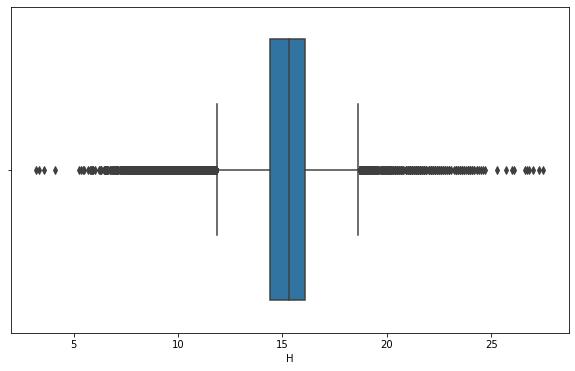

In [17]:
#plotting boxplot to get an idea about skewness of data and whether to impute the missing data 
#of H column with mean, median or mode
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(asteroid_data.H)

In [18]:
# getting H column's  mode
asteroid_data['H'].mode()

0    15.2
dtype: float64

In [19]:
#imputing missing data of H column with mode
asteroid_data['H'].fillna(asteroid_data['H'].mode()[0], inplace= True)

In [20]:
asteroid_data.isnull().sum()

a                   0
e                   0
i                   0
om                  0
w                   0
q                   0
ad                  0
per_y               0
data_arc          129
condition_code      0
n_obs_used          0
H                   0
neo                 0
pha                 0
diameter            0
albedo              0
moid                0
class               0
n                   0
per                 0
ma                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


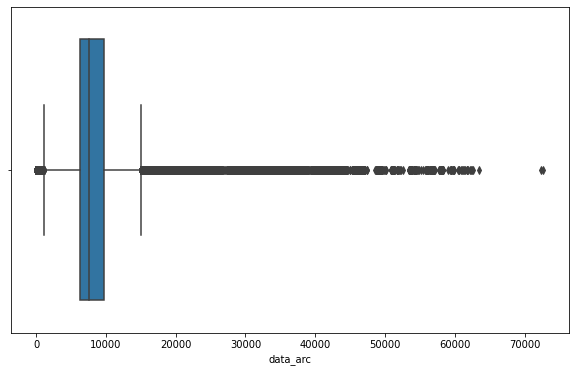

In [21]:
##plotting boxplot to get an idea about skewness of data and whether to impute the missing data 
#of data_arc column with mean, median or mode
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(asteroid_data.data_arc)

In [22]:
# imputing missing values of data_arc with median
asteroid_data['data_arc'].fillna(asteroid_data['data_arc'].median(), inplace=True)

In [23]:
# reviewing the number of missing values
asteroid_data.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

In [24]:
#getting thefinal shape ofdataset after dropping rows and columns and imputations
asteroid_data.shape

(135706, 21)

In [25]:
#getting correlation od whole data
correlation= asteroid_data.corr()

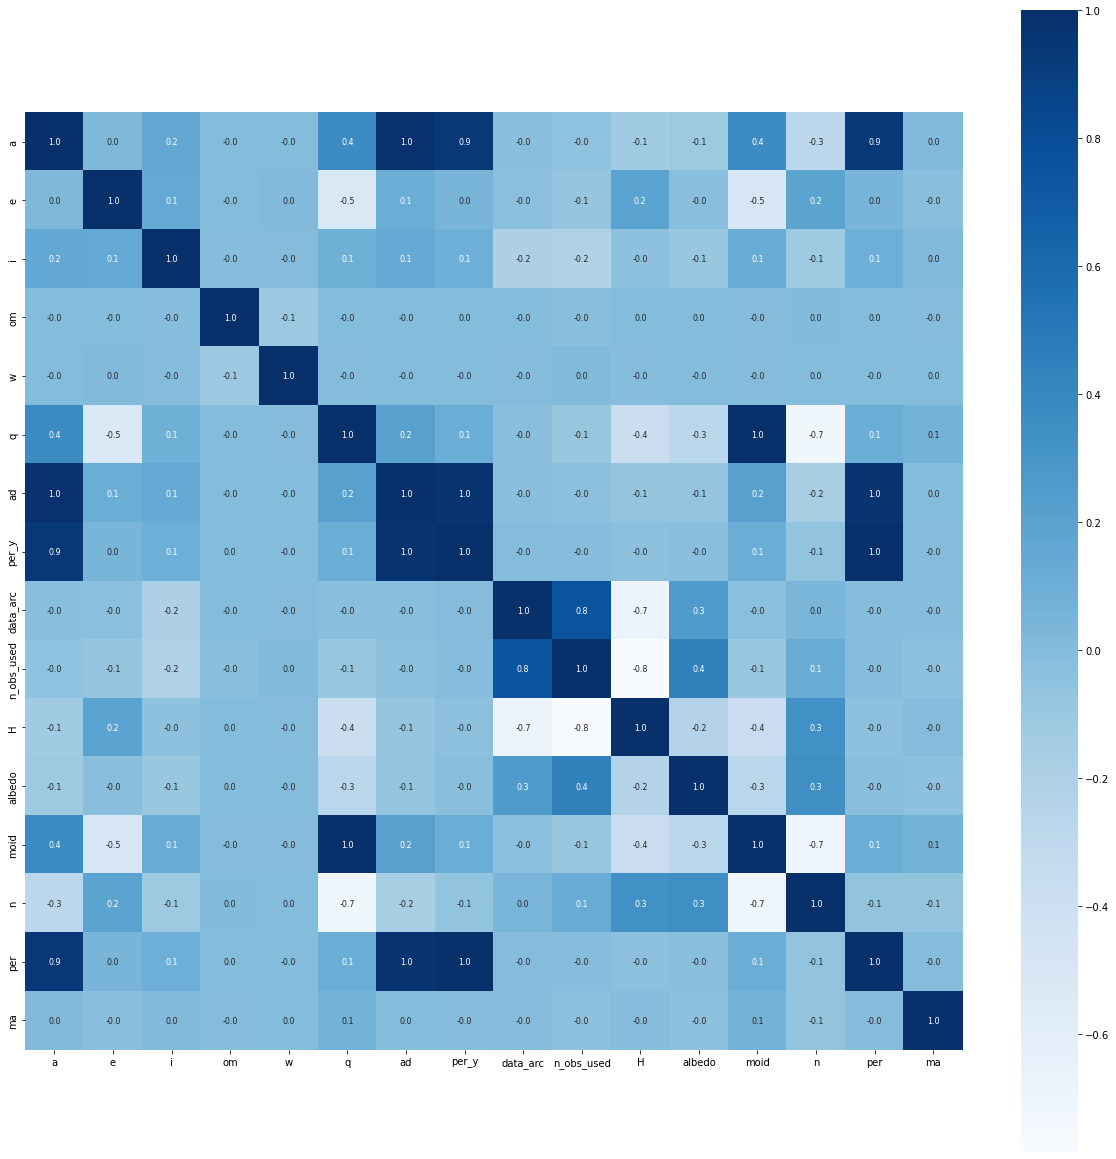

In [26]:
# getting heatmap/correlation matrix
plt.figure(figsize=(21,21))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,  annot_kws={'size':8}, cmap='Blues')


In [27]:
# making non null non numeric data of diameter numeric
asteroid_data = asteroid_data[pd.to_numeric(asteroid_data['diameter'], errors='coerce').notnull()] 

In [28]:
#getting value ount for near earth object column
print(asteroid_data.neo.value_counts())

N    134907
Y       798
Name: neo, dtype: int64


In [29]:
# label encoding
asteroid_data.replace({"neo":{'N':0,'Y':1}}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
#getting value count for pha column
print(asteroid_data.pha.value_counts())

N    135507
Y       198
Name: pha, dtype: int64


In [31]:
# label encoding
asteroid_data.replace({"pha":{'N':0,'Y':1}}, inplace=True)

In [32]:
#getting value count for class column
asteroid_data['class'].value_counts()

MBA    124668
OMB      7381
TJN      1873
IMB       571
APO       452
MCA       345
AMO       255
ATE        91
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


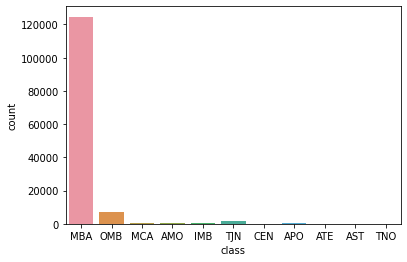

In [33]:
#getting countplot for class column
sns.countplot('class', data= asteroid_data)

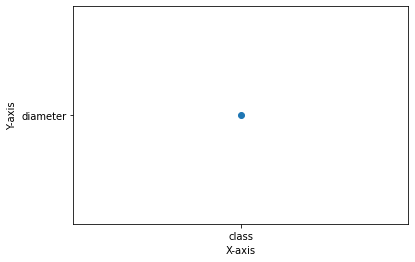

In [34]:
plt.scatter(x='class',y='diameter')
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [35]:
# getting first 20 rows to inspect dataset after above changes
asteroid_data.head(20)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,...,3.34,0,0,939.4,0.0900,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,...,4.13,0,0,545,0.1010,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,...,5.33,0,0,246.596,0.2140,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,...,3.20,0,0,525.4,0.4228,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,...,6.85,0,0,106.699,0.2740,1.095890,MBA,0.238632,1508.600458,282.366289
5,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,0,...,5.71,0,0,185.18,0.2679,0.973965,MBA,0.260972,1379.459705,86.197923
6,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0,...,5.51,0,0,199.83,0.2766,0.846100,MBA,0.267535,1345.619196,140.419656
7,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,0,...,6.49,0,0,147.491,0.2260,0.874176,MBA,0.301681,1193.313717,194.882895
8,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,0,...,6.28,0,0,190,0.1180,1.106910,MBA,0.267484,1345.875362,276.861623
9,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,0,...,5.43,0,0,407.12,0.0717,1.778390,MBA,0.177007,2033.818284,152.184851


In [36]:
# converting diameter values to numeric format so that boxplot can be plotted
asteroid_data['diameter'] = pd.to_numeric(asteroid_data['diameter'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


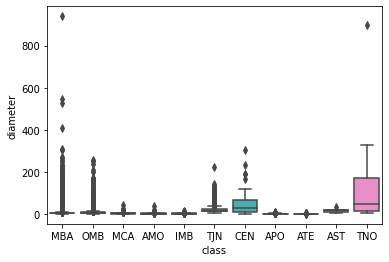

In [37]:
# plotting box plot between diameter and class column
sns.boxplot(x='class', y='diameter', data=asteroid_data)

In [38]:
#getting description of diameter in accordance with each class
group_by_class = asteroid_data.groupby('class').agg({
    'diameter':['mean','median','min','max','std','var','count']})
print(group_by_class)

         diameter                                                           
             mean   median    min      max         std           var   count
class                                                                       
AMO      1.783922   1.0450  0.088   37.675    3.040177      9.242676     255
APO      0.950018   0.5985  0.008    8.480    1.067734      1.140056     452
AST     14.283429  16.4000  2.656   32.492   10.028549    100.571796       7
ATE      0.622242   0.3700  0.023    3.879    0.708146      0.501471      91
CEN     52.473245  28.0000  0.890  302.000   63.978581   4093.258785      49
IMB      2.302081   1.7510  0.742   11.506    1.487166      2.211662     571
MBA      5.102895   3.8560  0.716  939.400    8.303630     68.950268  124668
MCA      3.452365   2.6000  0.587   42.870    3.553763     12.629234     345
OMB      8.869545   6.4110  0.347  254.000   12.109223    146.633283    7381
TJN     20.777425  15.4710  4.562  225.000   16.490069    271.922363    1873

In [39]:
# getting correlation tabeof each feaature with each other
asteroid_data.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,n,per,ma
a,1.000000,0.021934,0.150127,-0.000682,-0.002443,0.366131,0.986287,0.941696,-0.019882,-0.049372,-0.133665,-0.051248,-0.030166,0.145025,-0.109957,0.369338,-0.279822,0.941696,0.013760
e,0.021934,1.000000,0.144324,-0.001068,0.012788,-0.513368,0.114107,0.048921,-0.028357,-0.076810,0.194691,0.337810,0.166287,-0.048416,-0.018370,-0.489924,0.189334,0.048921,-0.019605
i,0.150127,0.144324,1.000000,-0.013949,-0.004752,0.087926,0.142222,0.097504,-0.192735,-0.218478,-0.039667,0.101012,0.026650,0.056102,-0.088152,0.126674,-0.111567,0.097504,0.012673
om,-0.000682,-0.001068,-0.013949,1.000000,-0.108042,-0.002863,-0.000209,0.000371,-0.000005,-0.023208,0.002443,0.003636,0.000745,0.001285,0.001132,-0.003698,0.008010,0.000371,-0.003854
w,-0.002443,0.012788,-0.004752,-0.108042,1.000000,-0.006898,-0.001345,-0.001637,-0.005388,0.010548,-0.008474,0.001246,-0.002985,0.002962,-0.003066,-0.006781,0.002853,-0.001637,0.001623
q,0.366131,-0.513368,0.087926,-0.002863,-0.006898,1.000000,0.207529,0.109526,-0.018448,-0.081104,-0.376199,-0.229353,-0.121268,0.331264,-0.262824,0.996920,-0.709798,0.109526,0.070883
ad,0.986287,0.114107,0.142222,-0.000209,-0.001345,0.207529,1.000000,0.970507,-0.017628,-0.037517,-0.073791,-0.013196,-0.010204,0.093701,-0.068976,0.211446,-0.168268,0.970507,0.001893
per_y,0.941696,0.048921,0.097504,0.000371,-0.001637,0.109526,0.970507,1.000000,-0.007965,-0.011123,-0.035788,-0.007090,-0.004082,0.049047,-0.019471,0.111072,-0.060318,1.000000,-0.005398
data_arc,-0.019882,-0.028357,-0.192735,-0.000005,-0.005388,-0.018448,-0.017628,-0.007965,1.000000,0.753583,-0.673380,-0.030855,-0.011860,0.492752,0.254513,-0.025906,0.041143,-0.007965,-0.015301
n_obs_used,-0.049372,-0.076810,-0.218478,-0.023208,0.010548,-0.081104,-0.037517,-0.011123,0.753583,1.000000,-0.784050,-0.022125,-0.007873,0.385444,0.449437,-0.090547,0.128081,-0.011123,-0.044869


In [40]:
# getting correlation values of each feature with target feature ie diameter
asteroid_data.corrwith(asteroid_data["diameter"])

a             0.145025
e            -0.048416
i             0.056102
om            0.001285
w             0.002962
q             0.331264
ad            0.093701
per_y         0.049047
data_arc      0.492752
n_obs_used    0.385444
H            -0.569944
neo          -0.035393
pha          -0.018915
diameter      1.000000
albedo       -0.108464
moid          0.334034
n            -0.204116
per           0.049047
ma            0.010228
dtype: float64

In [144]:
#encoder = OrdinalEncoder()

#asteroid_data['class']=asteroid_data[['class']].reshape(-1,1)
#result = encoder.fit_transform(asteroid_data[['class']])
#print(result)

In [41]:
#for class column with more than two categories applying ordinal encoder
#to encode classes subsets
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
asteroid_data["class_code"] = ord_enc.fit_transform(asteroid_data[["class"]])
asteroid_data[["class", "class_code"]].tail(100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,class,class_code
722437,MBA,6.0
723172,MBA,6.0
723719,MBA,6.0
723730,MBA,6.0
723969,MBA,6.0
...,...,...
731843,MBA,6.0
731921,MBA,6.0
732059,MBA,6.0
732060,MBA,6.0


In [42]:
#getting nmber of encoding classes code
asteroid_data['class_code'].value_counts()

6.0     124668
8.0       7381
9.0       1873
5.0        571
1.0        452
7.0        345
0.0        255
3.0         91
4.0         49
10.0        13
2.0          7
Name: class_code, dtype: int64

In [43]:
#number of categories of classes just to compare with above class code
asteroid_data['class'].value_counts()

MBA    124668
OMB      7381
TJN      1873
IMB       571
APO       452
MCA       345
AMO       255
ATE        91
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [44]:
#again getting correlation of diameter with all features
asteroid_data.corrwith(asteroid_data["diameter"])

a             0.145025
e            -0.048416
i             0.056102
om            0.001285
w             0.002962
q             0.331264
ad            0.093701
per_y         0.049047
data_arc      0.492752
n_obs_used    0.385444
H            -0.569944
neo          -0.035393
pha          -0.018915
diameter      1.000000
albedo       -0.108464
moid          0.334034
n            -0.204116
per           0.049047
ma            0.010228
class_code    0.173846
dtype: float64

In [45]:
#dropping those features having negative correlation with diameter column
asteroid_data.drop(asteroid_data[['e', 'H','neo','pha','albedo','n']], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:

#dropping those features having very negligiablecorrelation with diameter correlation with diameter column
asteroid_data.drop(asteroid_data[['om', 'w','ma']], axis=1,inplace=True)

In [47]:
#dropping those features having very negligiablecorrelation with diameter correlation with diameter column
#asteroid_data.drop(asteroid_data[['a','i','ad','per_y','per','class_code']], axis=1,inplace=True)

In [48]:
#getting final dataset shape
asteroid_data.shape

(135705, 13)

In [49]:
#getting final description of dataset
asteroid_data.describe()

,a,i,q,ad,per_y,data_arc,n_obs_used,diameter,moid,per,class_code
count,135705.000000,135705.000000,135705.000000,135705.000000,135705.000000,135705.000000,135705.000000,135705.000000,135705.000000,1.357050e+05,135705.000000
mean,2.814317,10.278176,2.402954,3.225680,4.885269,9044.191938,683.263763,5.516698,1.420226,1.784344e+03,6.118035
std,1.532770,6.796145,0.517201,2.916167,25.713312,6161.492621,595.517153,9.425705,0.513472,9.391787e+03,0.703813
min,0.626226,0.021855,0.081882,0.999956,0.495569,1.000000,5.000000,0.008000,0.000166,1.810067e+02,0.000000
25%,2.535833,5.080793,2.068446,2.863872,4.038213,6322.000000,223.000000,2.785000,1.081810,1.474957e+03,6.000000
50%,2.749229,9.323465,2.362913,3.164851,4.558527,7597.000000,506.000000,3.980000,1.383390,1.665002e+03,6.000000
75%,3.091631,13.653885,2.685871,3.465474,5.436127,9778.000000,993.000000,5.777000,1.699210,1.985545e+03,6.000000
max,389.145964,170.323647,40.465671,772.201080,7676.742943,72684.000000,9325.000000,939.400000,39.507000,2.803930e+06,10.000000


In [50]:
asteroid_data.head()

,a,i,q,ad,per_y,data_arc,condition_code,n_obs_used,diameter,moid,class,per,class_code
0,2.769165,10.594067,2.558684,2.979647,4.608202,8822.0,0,1002.0,939.400,1.59478,MBA,1683.145708,6.0
1,2.772466,34.836234,2.133865,3.411067,4.616444,72318.0,0,8490.0,545.000,1.23324,MBA,1686.155999,6.0
2,2.669150,12.988919,1.983332,3.354967,4.360814,72684.0,0,7104.0,246.596,1.03454,MBA,1592.787285,6.0
3,2.361418,7.141771,2.151909,2.570926,3.628837,24288.0,0,9325.0,525.400,1.13948,MBA,1325.432765,6.0
4,2.574249,5.366988,2.082324,3.066174,4.130323,63507.0,0,2916.0,106.699,1.09589,MBA,1508.600458,6.0


In [51]:
asteroid_data.drop('class', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
asteroid_data.head()

,a,i,q,ad,per_y,data_arc,condition_code,n_obs_used,diameter,moid,per,class_code
0,2.769165,10.594067,2.558684,2.979647,4.608202,8822.0,0,1002.0,939.400,1.59478,1683.145708,6.0
1,2.772466,34.836234,2.133865,3.411067,4.616444,72318.0,0,8490.0,545.000,1.23324,1686.155999,6.0
2,2.669150,12.988919,1.983332,3.354967,4.360814,72684.0,0,7104.0,246.596,1.03454,1592.787285,6.0
3,2.361418,7.141771,2.151909,2.570926,3.628837,24288.0,0,9325.0,525.400,1.13948,1325.432765,6.0
4,2.574249,5.366988,2.082324,3.066174,4.130323,63507.0,0,2916.0,106.699,1.09589,1508.600458,6.0


In [53]:
X=asteroid_data.drop(columns=['diameter'], axis=1)
Y= asteroid_data['diameter']

In [54]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

In [55]:
# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [56]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (81423, 11)
X_test shape: (27141, 11)
y_train shape: (81423,)
y_test shape: (27141,)
X_val shape: (81423,)
y val shape: (27141,)


In [57]:
from xgboost import XGBRegressor
from sklearn import metrics

In [58]:
# loading the model
model = XGBRegressor()

In [59]:
asteroid_data['condition_code'].dtype

dtype('O')

In [60]:
asteroid_data['condition_code'] = asteroid_data['condition_code'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
asteroid_data['condition_code'].dtype

dtype('int64')

In [62]:
X=asteroid_data.drop(columns=['diameter'], axis=1)
Y= asteroid_data['diameter']

In [63]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state = 8)

In [64]:
# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [65]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (81423, 11)
X_test shape: (27141, 11)
y_train shape: (81423,)
y_test shape: (27141,)
X_val shape: (81423,)
y val shape: (27141,)


In [326]:
from xgboost import XGBRegressor
from sklearn import metrics

In [327]:
# loading the model
model = XGBRegressor()

In [328]:
# ttraining the model with X_train
model.fit(X_train, y_train)

[16:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [329]:
# accuracy for prediction on traning data
training_data_prediction = model.predict(X_train)

In [330]:
# squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

# mean absolute error
score_3 = metrics.mean_squared_error(y_train, training_data_prediction)


print('R squared error:' ,score_1)
print(' absolute error value:' ,score_2)
print(' mean squared error value:' ,score_3)

R squared error: 0.7750444235632601
 absolute error value: 1.312815768303361
 mean squared error value: 21.853081972799114


In [320]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [321]:
# accuracy for prediction on traning data
training_data_prediction = regressor.predict(X_train)

In [322]:
# squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print('R squared error:' ,score_1)
print(' absolute error value:' ,score_2)


R squared error: 0.47568675885176337
 absolute error value: 1.64354065594816


In [70]:
import lightgbm as lgb

In [71]:
# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [72]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rate': 0.1,
    'metric': {'l2','l1'},
    'verbose': -1
}

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)
  

[1]	valid_0's l2: 73.6196	valid_0's l1: 2.94156
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l2: 67.0003	valid_0's l1: 2.77976
[3]	valid_0's l2: 61.3015	valid_0's l1: 2.66515
[4]	valid_0's l2: 56.7861	valid_0's l1: 2.53616
[5]	valid_0's l2: 52.8015	valid_0's l1: 2.41504
[6]	valid_0's l2: 49.455	valid_0's l1: 2.31411
[7]	valid_0's l2: 46.792	valid_0's l1: 2.21927
[8]	valid_0's l2: 44.3805	valid_0's l1: 2.14643
[9]	valid_0's l2: 42.4627	valid_0's l1: 2.08557
[10]	valid_0's l2: 40.8189	valid_0's l1: 2.02009
[11]	valid_0's l2: 39.3657	valid_0's l1: 1.97444
[12]	valid_0's l2: 38.1178	valid_0's l1: 1.91505
[13]	valid_0's l2: 36.8447	valid_0's l1: 1.85654
[14]	valid_0's l2: 36.0487	valid_0's l1: 1.83692
[15]	valid_0's l2: 35.0332	valid_0's l1: 1.7976
[16]	valid_0's l2: 34.2751	valid_0's l1: 1.76342
[17]	valid_0's l2: 33.6263	valid_0's l1: 1.73796
[18]	valid_0's l2: 33.0047	valid_0's l1: 1.7041
[19]	valid_0's l2: 32.6383	valid_0's l1: 1.67839
[20]	valid_0's l2: 3

In [73]:
# prediction
y_pred = model.predict(X_test)

# accuracy check
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 26.43
RMSE: 5.14


In [ ]:
from sklearn.svm import SVR
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train,y_train)
clf.best_params_

In [ ]:
# print how our model looks after hyper-parameter tuning
clf.best_estimator_

In [ ]:
# accuracy for prediction on traning data
training_data_prediction = model.predict(X_train)

In [ ]:
# squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

# mean absolute error
score_3 = metrics.mean_squared_error(y_train, training_data_prediction)


print('R squared error:' ,score_1)
print(' absolute error value:' ,score_2)
print(' mean squared error value:' ,score_3)